In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
# datasets
import torchvision
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
BATCH_SIZE = 128
IMG_SIZE = 64

def load_transformed_dataset():
    data_transforms = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: (x*2)-1)
    ])

    train  = torchvision.datasets.StanfordCars(root='/ssd_scratch/cvit/anirudhkaushik/datasets/stanford-car-dataset-by-classes-folder/car_data/', split="train", download=False, transform=data_transforms)
    test   = torchvision.datasets.StanfordCars(root='/ssd_scratch/cvit/anirudhkaushik/datasets/stanford-car-dataset-by-classes-folder/car_data/', split="test", download=False, transform=data_transforms)


    return torch.utils.data.ConcatDataset([train, test])
def show(image):
    reverse_transform = transforms.Compose([
        transforms.Lambda(lambda x: (x+1)/2),
        transforms.Lambda(lambda x: x.permute(1,2,0)),
        transforms.Lambda(lambda x: x*255.),
        transforms.Lambda(lambda x: x.numpy().astype(np.uint8)),
        transforms.ToPILImage()
    ])

    if(len(image.shape) == 4):
        image = image[0,:,:,:]

    plt.imshow(reverse_transform(image))

data = load_transformed_dataset()
data_loader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)

In [3]:
from noise_scheduler import NoiseScheduler
beta_start = 0.0001
beta_end = 0.02
timesteps = 300


noise_scheduler = NoiseScheduler(beta_start, beta_end, timesteps, 32)
noise_scheduler.beta_scheduler()

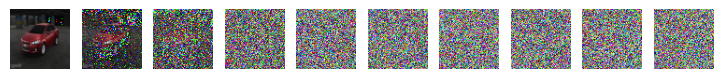

In [8]:
image = next(iter(data_loader))[0]

plt.figure(figsize=(10,10))
num_images = 10
stepsize = int(timesteps/num_images)

for idx in range(0, timesteps, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int((idx/stepsize)+1))
    # remove axis of subplot
    plt.axis('off')
    image, noise  = noise_scheduler.forward_diffusion(image, t)
    show(image.cpu().detach())